# Cancer Classification

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
file = "/Users/patrickfahy99/Documents/Kaggle_datasets/cancer_data.csv"
data = pd.read_csv(file)
pd.set_option('display.max_columns', 500)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


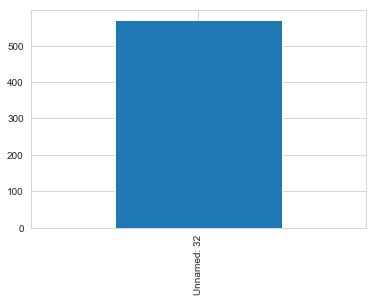

In [3]:
# Check missing values
sns.set_style("whitegrid")
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [4]:
# Remove Unnamed: 32 column
del data['Unnamed: 32']

In [5]:
# Encode letters
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0}) 

In [6]:
# Create features and target dataframes
y = data['diagnosis'].reset_index(drop=True)
X = data.loc[:, data.columns != 'diagnosis']

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [8]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier


#Create a list of machine learning algorithms
models = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    XGBClassifier()
    ]

# Scale the features - so that non tree based methods will be effectvive

from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)
X = scaler.transform(X)


In [9]:
from xgboost import XGBClassifier
from sklearn import model_selection

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Creating KFold cross validation sets
kf = KFold(n_splits=5, random_state=0)

In [11]:
# Iterating through the models and finding the cross validation score for each
for model in models:
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)
    # report performance
    if scores.mean() > 0.935:
        print('Accuracy: {:.3f} ({:.3f}), Model: {}'.format(scores.mean(), scores.std(), model))

Accuracy: 0.949 (0.023), Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Accuracy: 0.945 (0.033), Model: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Accuracy: 0.954 (0.033), Model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
           

In [12]:
# Now we look at models that performed well
model1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=140,
 max_depth=2,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

model1.fit(X_train, y_train)

print(model1.score(X_train,y_train), model1.score(X_test,y_test))

0.9956043956043956 0.9649122807017544


In [13]:
model2 = svm.SVC(probability=True)
cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

model2.fit(X_train, y_train)

print(model2.score(X_train,y_train), model2.score(X_test,y_test))

0.9846153846153847 0.9824561403508771


In [14]:
model3 = ensemble.RandomForestClassifier()
cross_val_score(model3, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

model3.fit(X_train, y_train)

print(model3.score(X_train,y_train), model3.score(X_test,y_test))

1.0 0.9736842105263158


In [15]:
model4 = linear_model.LogisticRegressionCV()
cross_val_score(model4, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

model4.fit(X_train, y_train)

print(model4.score(X_train,y_train), model4.score(X_test,y_test))

0.9824175824175824 0.9824561403508771


In [16]:
model5 = linear_model.SGDClassifier()
cross_val_score(model5, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1)

model5.fit(X_train, y_train)

print(model5.score(X_train,y_train), model5.score(X_test,y_test))

0.9472527472527472 0.9736842105263158


In [17]:
from sklearn.ensemble import VotingClassifier

# Join these models together
eclf1 = VotingClassifier([('a',model1),('b',model2),('c',model3),('d',model4),('e',model5)],
                        voting = 'hard')
eclf1 = eclf1.fit(X_train, y_train)

eclf1.predict(X_test)
print(eclf1.score(X_test,y_test),eclf1.score(X_train,y_train))

0.9824561403508771 0.9912087912087912


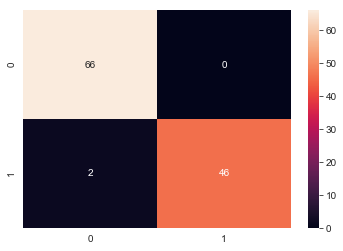

In [18]:
# See how this model performs on the test set
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,eclf1.predict(X_test))
sns.heatmap(cm, annot = True)